In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nsepy import get_history
from datetime import date, timedelta
from warnings import filterwarnings

In [3]:
filterwarnings("ignore")

In [4]:
data = get_history(symbol="MARUTI", start=date(2017, 1, 1), end=date.today())
# data = pd.read_csv("maruti.csv")

In [5]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-11-17,MARUTI,EQ,6852.25,6865.00,6996.9,6863.0,6987.0,6981.45,6945.06,1243068,8.633181e+14,105517,527415,0.4243
2020-11-18,MARUTI,EQ,6981.45,6979.95,7070.0,6948.0,7057.5,7054.30,7017.14,1400300,9.826095e+14,108676,458370,0.3273
2020-11-19,MARUTI,EQ,7054.30,7031.00,7130.0,6915.2,6949.0,6963.30,7064.08,1305695,9.223530e+14,107063,355421,0.2722
2020-11-20,MARUTI,EQ,6963.30,6959.55,7020.0,6904.0,6959.0,6965.85,6966.07,923474,6.432988e+14,69257,230846,0.2500
2020-11-23,MARUTI,EQ,6965.85,7040.00,7044.0,6932.6,6986.5,6987.75,6982.52,735755,5.137424e+14,62356,296127,0.4025


In [6]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2017-01-02,MARUTI,EQ,5319.55,5320.05,5474.2,5267.8,5470.00,5466.00,5386.21,651321,3.508149e+14,47570,134496,0.2065
2017-01-03,MARUTI,EQ,5466.00,5466.00,5524.2,5432.6,5511.25,5508.40,5485.36,631753,3.465393e+14,40885,252967,0.4004
2017-01-04,MARUTI,EQ,5508.40,5530.00,5554.7,5494.0,5511.00,5502.15,5521.15,679443,3.751304e+14,40184,395562,0.5822
2017-01-05,MARUTI,EQ,5502.15,5525.10,5649.9,5525.1,5649.90,5634.95,5600.23,744210,4.167747e+14,71260,338220,0.4545
2017-01-06,MARUTI,EQ,5634.95,5650.00,5657.3,5597.0,5637.00,5615.55,5616.11,544695,3.059066e+14,51306,257379,0.4725


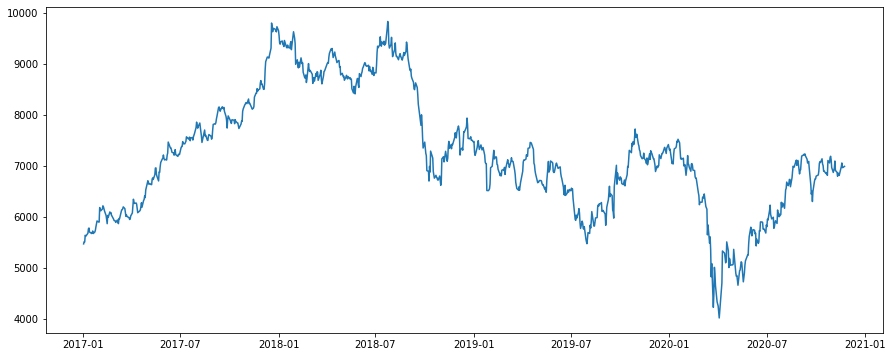

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(data["Close"])
plt.show()

In [8]:
close = np.array(data[["Close"]])
close = np.reshape(close, (close.shape[0]))
close.shape

(965,)

In [9]:
var = []
for i in range(6, 494):
    var.append(np.var(close[i-6:i]))
len(var)

488

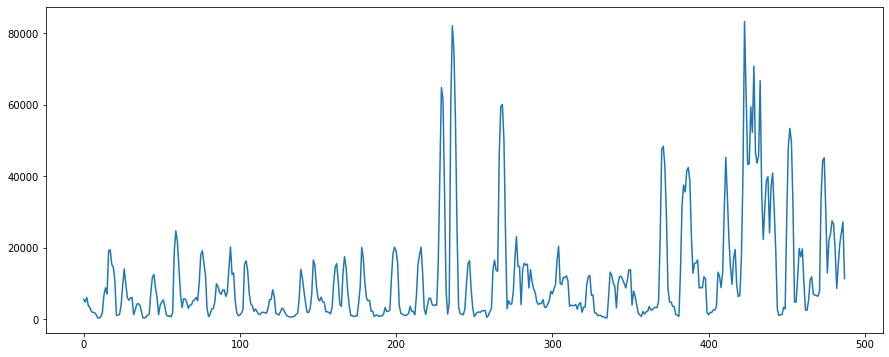

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(var)

In [11]:
print(type(close))
print(close.shape)

<class 'numpy.ndarray'>
(965,)


In [12]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

class StationarityTests:
    def __init__(self, significance = 0.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        adfTest = adfuller(timeseries, autolag='AIC')
        self.pValue = adfTest[1]
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value

            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)
            
            
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(close, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

ModuleNotFoundError: No module named 'statsmodels'

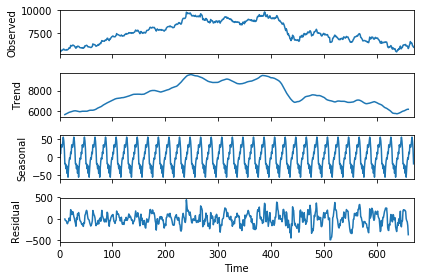

In [41]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(close, model='additive', freq=20)
result.plot()
pyplot.show()

<function matplotlib.pyplot.show(*args, **kw)>

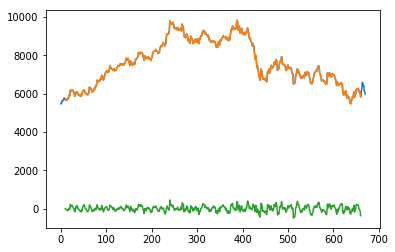

In [43]:
plt.plot(close)
plt.figure(figsize=(15, 6))
plt.plot(result.seasonal+result.trend+result.resid)
plt.plot(result.resid)
plt.show

In [37]:
len(close)

671

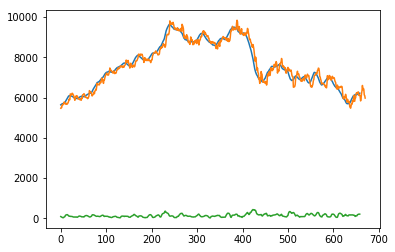

In [38]:
ma = []
std = []
for i in range(12, 671):
    ma.append(close[i-12:i].mean())
    std.append(close[i-12:i].std())
plt.figure(figsize=(15, 6))
plt.plot(ma)
plt.plot(close)
plt.plot(std)
plt.show()

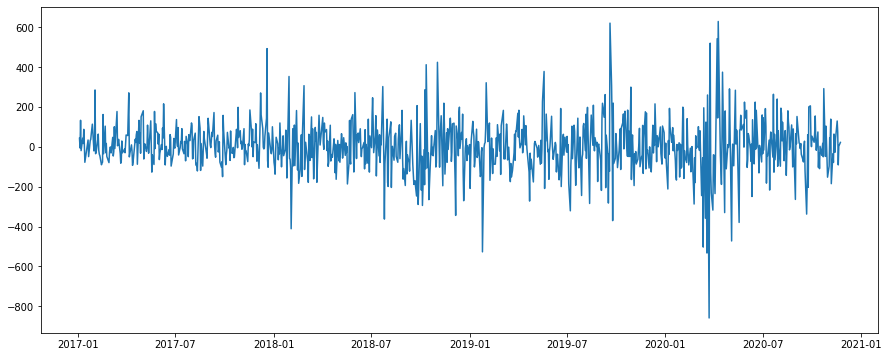

(965, 1)

In [14]:
diff = data[["Close"]].diff()

plt.figure(figsize=(15, 6))
plt.plot(diff)
plt.show()

diff.shape

In [15]:
diff.isna().iloc[:, 0].value_counts("True")

False    0.998964
True     0.001036
Name: Close, dtype: float64

In [16]:
diff.fillna(value=0, inplace=True)

In [17]:
diff_close = np.array(diff)
diff_close = np.reshape(diff_close, (diff_close.shape[0],))
print(type(diff_close))
print(diff_close.shape)

<class 'numpy.ndarray'>
(965,)


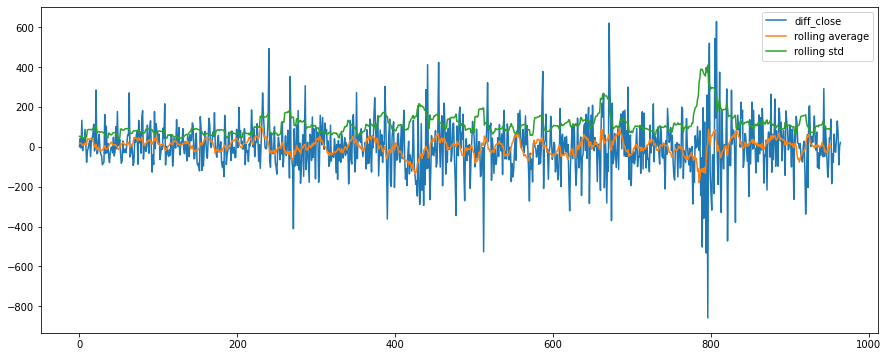

In [18]:
ma = []
std = []
for i in range(12, 965):
    ma.append(diff_close[i-12:i].mean())
    std.append(diff_close[i-12:i].std())
plt.figure(figsize=(15, 6))
plt.plot(diff_close, label="diff_close")
plt.plot(ma, label="rolling average")
plt.plot(std, label="rolling std")
plt.legend()
plt.show()

In [19]:
diff_close = np.reshape(diff_close, (diff_close.shape[0], 1))

In [20]:
close = np.reshape(close, (close.shape[0], 1))

In [24]:
train_data = close[:615]
test_data = close[615:]

In [25]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range = (0, 1))
train_data_scaled = scale.fit_transform(train_data)

In [26]:
X_train = []
y_train = []

for i in range(10, 615):
    X_train.append(train_data_scaled[i-10:i, 0])
    y_train.append(train_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [28]:
X_train.shape

(605, 10, 1)

In [29]:
import tensorflow as tf

In [30]:
model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Conv1D(filters=50, kernel_size=5, strides=1, padding="causal", activation="relu",
#                                  input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=100, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=100, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=100))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1))

model.compile(optimizer="adam", loss="mae")
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
19/19 [==============================] - 0s 14ms/step - loss: 0.2215
Epoch 2/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0927
Epoch 3/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0689
Epoch 4/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0624
Epoch 5/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0656
Epoch 6/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0681
Epoch 7/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0613
Epoch 8/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0643
Epoch 9/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0721
Epoch 10/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0627
Epoch 11/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0607
Epoch 12/200
19/19 [==============================] - 0s 15ms/step - loss: 0.0602
Epoch 13/200
19/19 [=====

19/19 [==============================] - 0s 14ms/step - loss: 0.0334
Epoch 102/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0349
Epoch 103/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0322
Epoch 104/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0316
Epoch 105/200
19/19 [==============================] - 0s 15ms/step - loss: 0.0332
Epoch 106/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0317
Epoch 107/200
19/19 [==============================] - 0s 15ms/step - loss: 0.0328
Epoch 108/200
19/19 [==============================] - 0s 13ms/step - loss: 0.0319
Epoch 109/200
19/19 [==============================] - 0s 15ms/step - loss: 0.0337
Epoch 110/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0332
Epoch 111/200
19/19 [==============================] - 0s 15ms/step - loss: 0.0323
Epoch 112/200
19/19 [==============================] - 0s 14ms/step - loss: 0.0323
Epoch 113/200
19/1

19/19 [==============================] - 0s 14ms/step - loss: 0.0286
Epoch 200/200
19/19 [==============================] - 0s 16ms/step - loss: 0.0276


In [31]:
inputs = close[:]

In [32]:
inputs = inputs.reshape(-1, 1)

In [33]:
inputs = scale.transform(inputs)

In [34]:
inputs.shape

(965, 1)

In [37]:
X_test = []

for i in range(10, 965):
    X_test.append(inputs[i-10:i, 0])

X_test = np.array(X_test)


In [38]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(955, 10, 1)

In [39]:
# X_test.append

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred = scale.inverse_transform(y_pred)

In [42]:
len(y_pred)

955

In [43]:
len(close[10:])

955

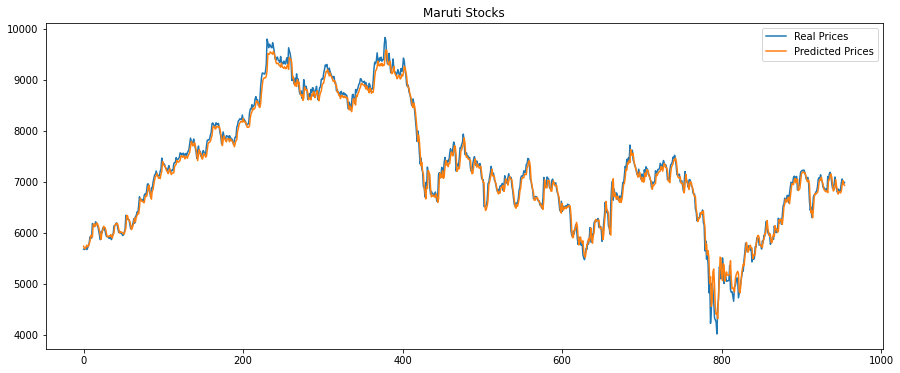

In [44]:
ma = []
for i in range(10, 484):
    ma.append(close[i-10:i].mean())

plt.figure(figsize=(15, 6))
plt.plot(close[10:], label="Real Prices")
plt.plot(y_pred, label="Predicted Prices")
plt.title("Maruti Stocks")
plt.legend()
# plt.savefig("maruti-better.png")
plt.show()


In [64]:
new_close = close[-10:]

In [65]:
new_close.shape

(10, 1)

In [67]:
new_close = scale.fit_transform(new_close)

In [68]:
print(new_close)

[[0.12844239]
 [0.        ]
 [0.28034809]
 [0.71579643]
 [0.08911655]
 [0.09032827]
 [0.44073584]
 [0.45725931]
 [0.91639128]
 [1.        ]]


In [69]:

new_close = np.reshape(new_close, (1, new_close.shape[0], new_close.shape[1]))
new_close.shape

(1, 10, 1)

In [70]:
new_prediction = model.predict(new_close)

In [71]:
new_prediction = scale.inverse_transform(new_prediction)

In [72]:
new_prediction

array([[6182.0327]], dtype=float32)

In [73]:
new_close = scale.inverse_transform(new_close[-1])

In [74]:
new_close

array([[5833.3 ],
       [5775.  ],
       [5902.25],
       [6099.9 ],
       [5815.45],
       [5816.  ],
       [5975.05],
       [5982.55],
       [6190.95],
       [6228.9 ]])

In [35]:
y_test = close[350:]
y_test.shape

(144, 1)

In [36]:
y_pred.shape

(144, 1)

In [37]:
# for i in range(20):
    

In [38]:
from sklearn.metrics import mean_absolute_error as mae


In [43]:
stat = mae(y_test, y_pred)

In [44]:
stat

110.52188924153648